EMPLOYEE BURNOUT ANALYSIS

 Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pickle


#Dataset Loading
  Load the dataset from an Excel file.


In [ ]:
data = pd.read_excel("employee_burnout_analysis-AI.xlsx", )


# Data Overview
    

Get a first glance at the dataset to understand its structure.


In [ ]:
data.head()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2,3.0,3.8,0.16
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1,2.0,5.0,0.36
2,fffe31003300320037003900,2008-03-10,Female,Product,Yes,2,NaN,5.8,0.49
3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,1,1.0,2.6,0.20
4,fffe31003900340031003600,2008-07-24,Female,Service,No,3,7.0,6.9,0.52


In [ ]:
data.describe()

,Date of Joining,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
count,22750,22750.000000,21369.000000,20633.000000,21626.000000
mean,2008-07-01 09:28:05.274725120,2.178725,4.481398,5.728188,0.452005
min,2008-01-01 00:00:00,0.000000,1.000000,0.000000,0.000000
25%,2008-04-01 00:00:00,1.000000,3.000000,4.600000,0.310000
50%,2008-07-02 00:00:00,2.000000,4.000000,5.900000,0.450000
75%,2008-09-30 00:00:00,3.000000,6.000000,7.100000,0.590000
max,2008-12-31 00:00:00,5.000000,10.000000,10.000000,1.000000
std,NaN,1.135145,2.047211,1.920839,0.198226


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22750 entries, 0 to 22749
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Employee ID           22750 non-null  object        
 1   Date of Joining       22750 non-null  datetime64[ns]
 2   Gender                22750 non-null  object        
 3   Company Type          22750 non-null  object        
 4   WFH Setup Available   22750 non-null  object        
 5   Designation           22750 non-null  int64         
 6   Resource Allocation   21369 non-null  float64       
 7   Mental Fatigue Score  20633 non-null  float64       
 8   Burn Rate             21626 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 1.6+ MB


In [ ]:
data.isnull().sum()

Employee ID                0
Date of Joining            0
Gender                     0
Company Type               0
WFH Setup Available        0
Designation                0
Resource Allocation     1381
Mental Fatigue Score    2117
Burn Rate               1124
dtype: int64

In [ ]:
data.isnull().sum().values.sum()

4622

#Exploratory Data Analysis(EDA) and Data Visualisation

Conducting EDA to uncover patterns and insights within the data.


In [ ]:
sns.set(style="whitegrid")




1.  Convert 'Date of Joining' to datetime format

2.  Analyze and visualize the number of employees hired each month.




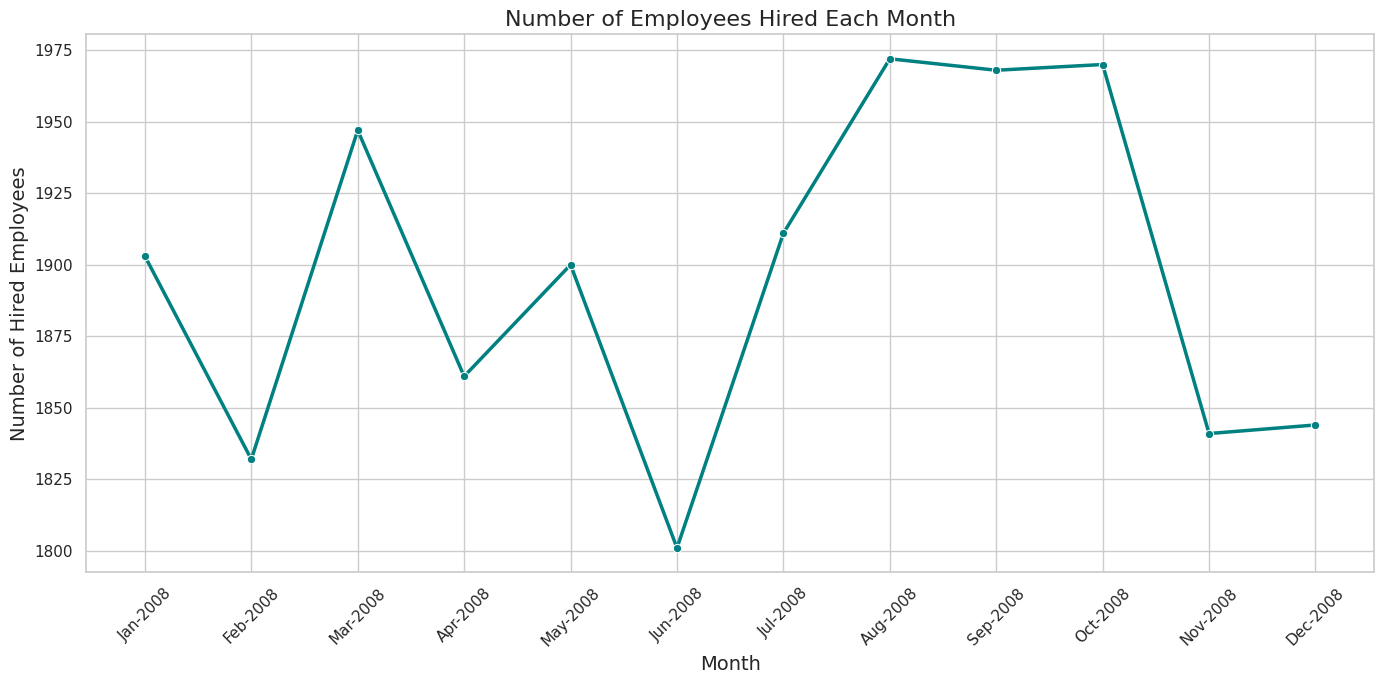

In [ ]:
data['Date of Joining'] = pd.to_datetime(data['Date of Joining'], format='%Y-%m-%d')

# Group by month and count the number of employees hired each month
monthly_hires = data['Date of Joining'].groupby(data['Date of Joining'].dt.to_period('M')).agg('count').reset_index(name='Hired Employees') # Use the name parameter in reset_index to avoid naming conflicts
monthly_hires['Month'] = monthly_hires['Date of Joining'].dt.strftime('%b-%Y') # Rename the 'Date of Joining' column to 'Month'
monthly_hires = monthly_hires.drop('Date of Joining', axis=1) # Drop the original 'Date of Joining' column

# Plot the data with enhanced aesthetics
plt.figure(figsize=(14, 7))
sns.lineplot(data=monthly_hires, x='Month', y='Hired Employees', marker='o', color='teal', linewidth=2.5)
plt.xticks(rotation=45)
plt.title('Number of Employees Hired Each Month', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Number of Hired Employees', fontsize=14)
plt.tight_layout()
plt.show()

Distribution of numerical features.


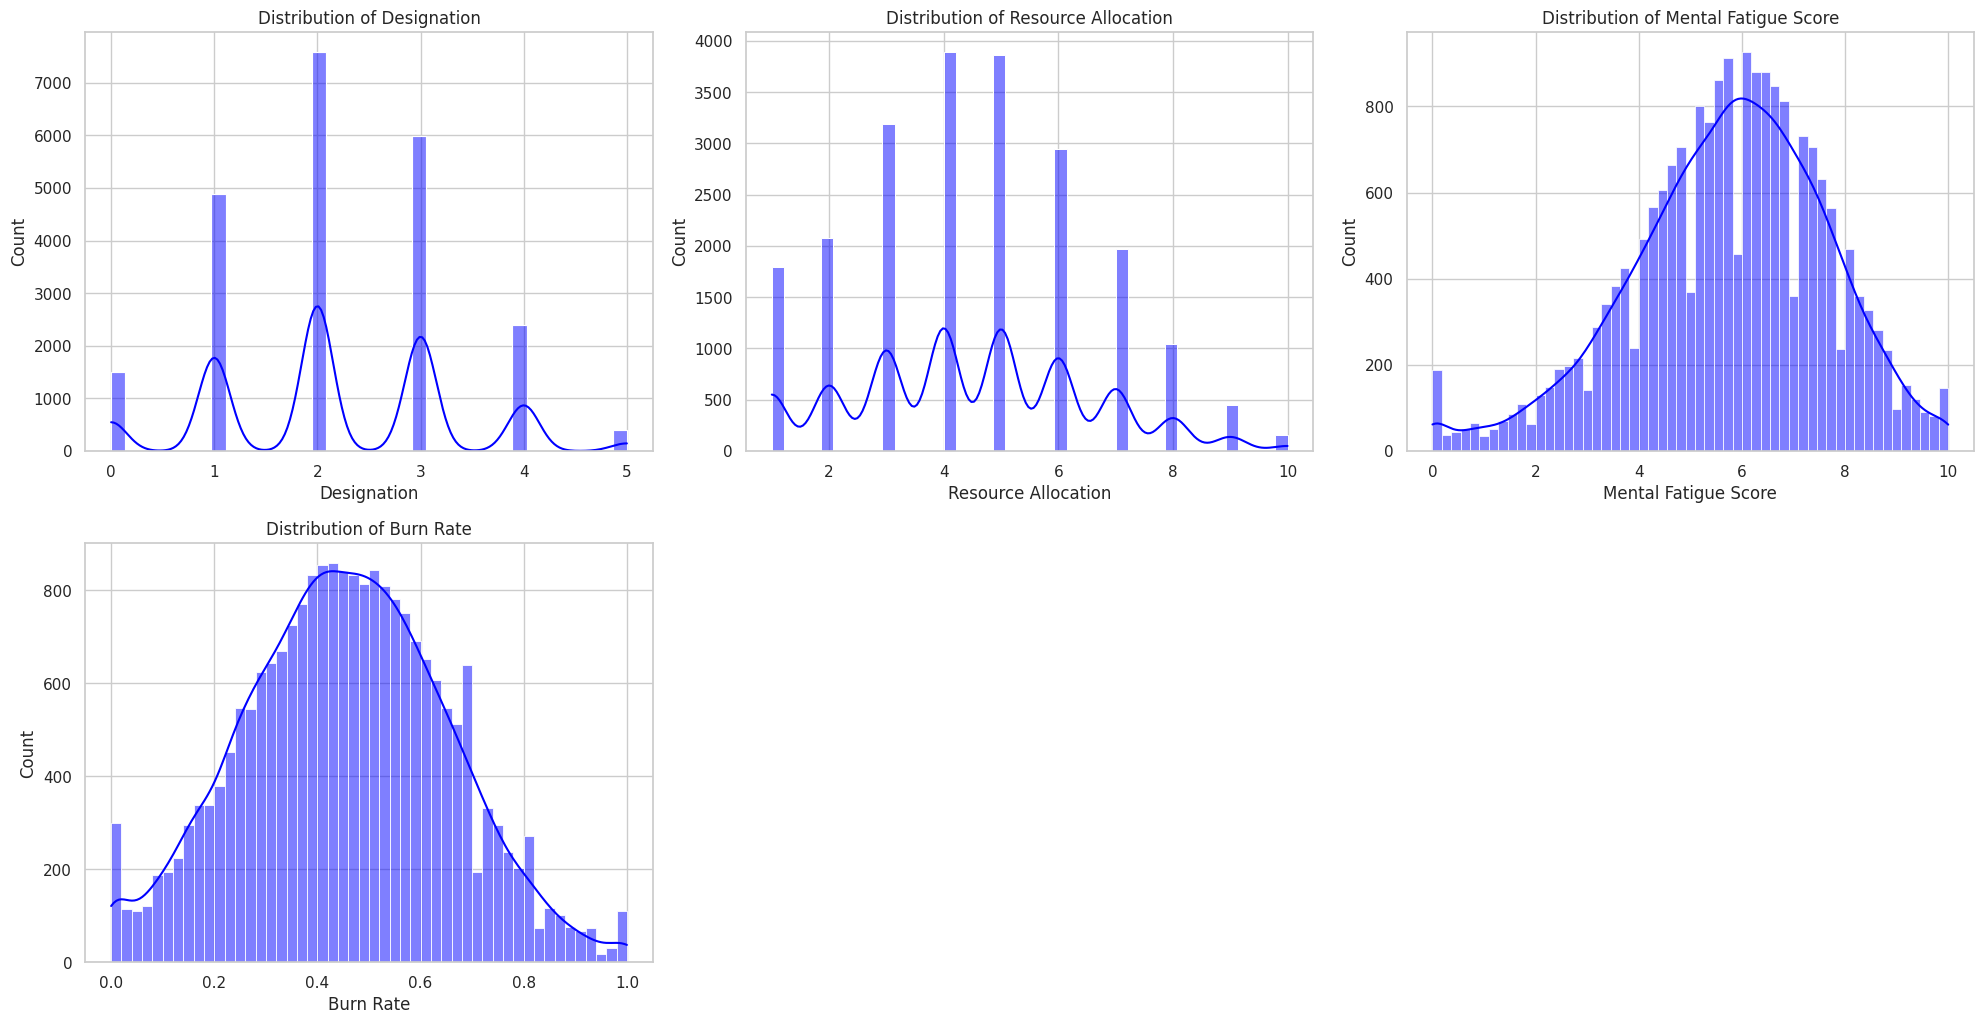

In [ ]:
numeric_features = data.select_dtypes(include=[np.number]).columns
plt.figure(figsize=(20, 15))
for i, col in enumerate(numeric_features, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data[col], kde=True, color='blue')
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

 Correlation analysis.



In [ ]:
data.corr(numeric_only=True)['Burn Rate'][:-1]

Designation             0.737556
Resource Allocation     0.856278
Mental Fatigue Score    0.944546
Name: Burn Rate, dtype: float64

 Heatmap of correlations.


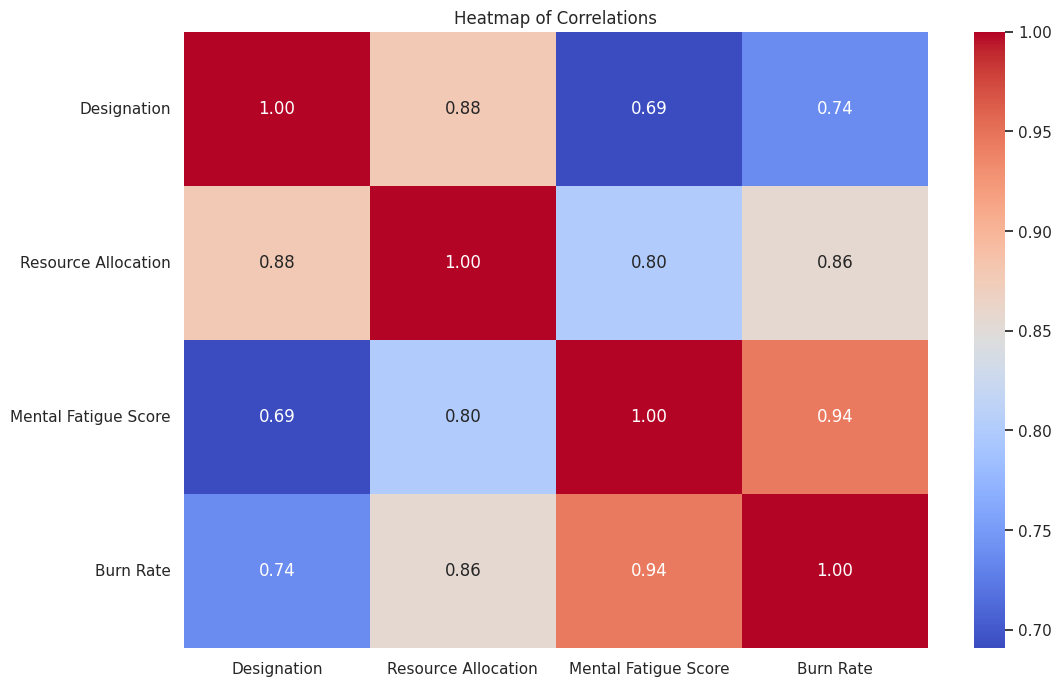

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap of Correlations')
plt.show()


 Pairplot for further visual analysis.


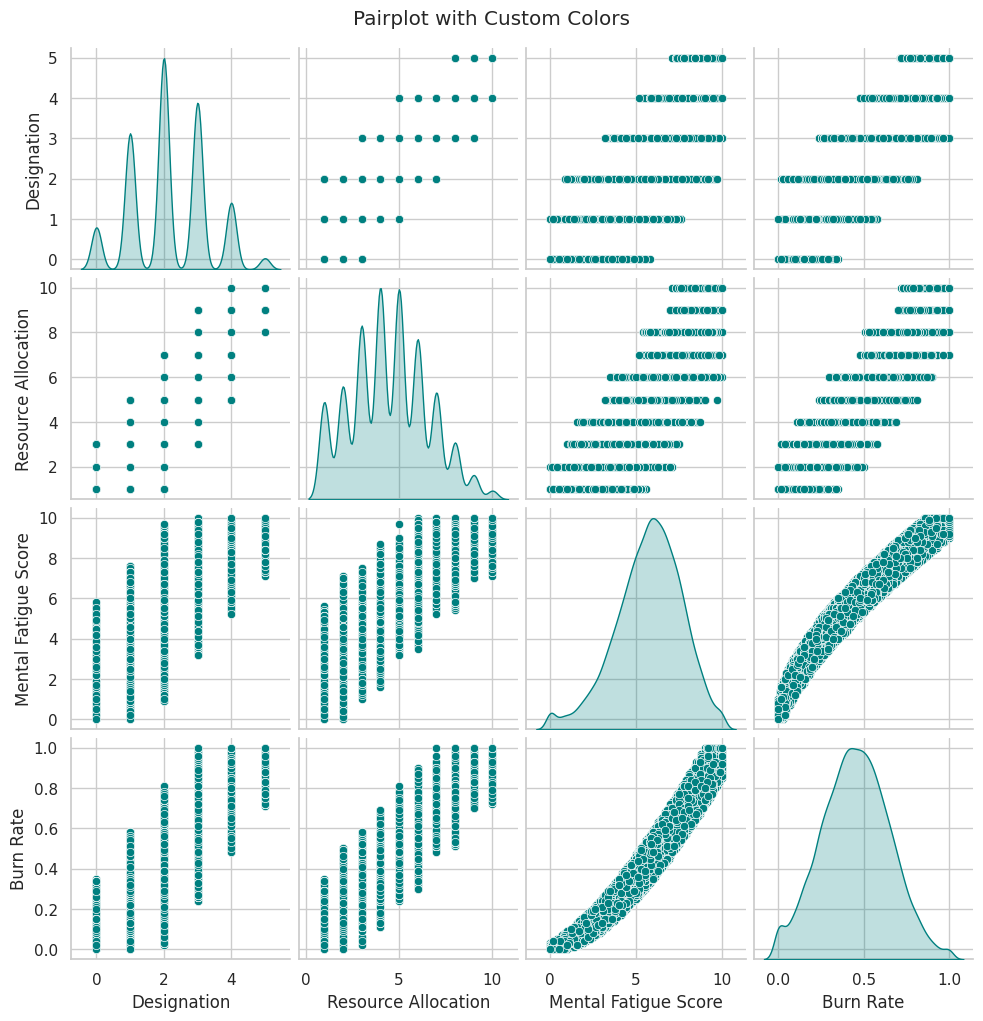

In [ ]:
pairplot = sns.pairplot(data, diag_kind='kde', plot_kws={'color': 'teal'}, diag_kws={'color': 'teal'})
pairplot.fig.suptitle('Pairplot with Custom Colors', y=1.02)
plt.show()

 Handling Missing Values.
 Dropping rows with missing values.

In [ ]:
data=data.dropna()


In [ ]:
data.shape


(18590, 9)

In [ ]:
data.dtypes


Employee ID                     object
Date of Joining         datetime64[ns]
Gender                          object
Company Type                    object
WFH Setup Available             object
Designation                      int64
Resource Allocation            float64
Mental Fatigue Score           float64
Burn Rate                      float64
dtype: object

 Display unique values in categorical columns.


In [ ]:
data_obj = data.select_dtypes(object)
print({c: data_obj[c].unique()[:10] for c in data_obj.columns})

{'Employee ID': array(['fffe32003000360033003200', 'fffe3700360033003500',
       'fffe32003400380032003900', 'fffe31003900340031003600',
       'fffe3300350037003500', 'fffe33003300340039003100',
       'fffe32003600320037003400', 'fffe33003100330032003700',
       'fffe3400310035003800', 'fffe33003100330036003300'], dtype=object), 'Gender': array(['Female', 'Male'], dtype=object), 'Company Type': array(['Service', 'Product'], dtype=object), 'WFH Setup Available': array(['No', 'Yes'], dtype=object)}


 Dropping 'Employee ID' column as it is not needed for analysis.


In [ ]:
data=data.drop('Employee ID',axis=1)


Creating 'Days' feature representing the number of days since 2008.


In [ ]:
data_2008=pd.to_datetime(["2008-01-01"]*len(data))
data["Days"]=data['Date of Joining'].astype("datetime64[ns]").sub(data_2008).dt.days
data.Days

0        273
1        334
3        307
4        205
5        330
        ... 
22743    349
22744    147
22746     18
22748      9
22749      5
Name: Days, Length: 18590, dtype: int64

 Correlation analysis post feature creation.


In [ ]:
numeric_data=data.select_dtypes(include=['number'])
correlation=numeric_data.corr()['Burn Rate']
print(correlation)


Designation             0.736412
Resource Allocation     0.855005
Mental Fatigue Score    0.944389
Burn Rate               1.000000
Days                    0.000309
Name: Burn Rate, dtype: float64


In [ ]:
data.corr(numeric_only=True)['Burn Rate'][:-1]


Designation             0.736412
Resource Allocation     0.855005
Mental Fatigue Score    0.944389
Burn Rate               1.000000
Name: Burn Rate, dtype: float64

 Dropping 'Date of Joining' and 'Days' columns.


In [ ]:
data=data.drop(['Date of Joining','Days'],axis=1)


 visualization for categorical columns.


<ipython-input-114-a9d5615091ac>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, ax=ax[i], palette=palette[:len(value_counts)])
<ipython-input-114-a9d5615091ac>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, ax=ax[i], palette=palette[:len(value_counts)])
<ipython-input-114-a9d5615091ac>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, ax=ax[i], palette=palette[:len(value_counts)])


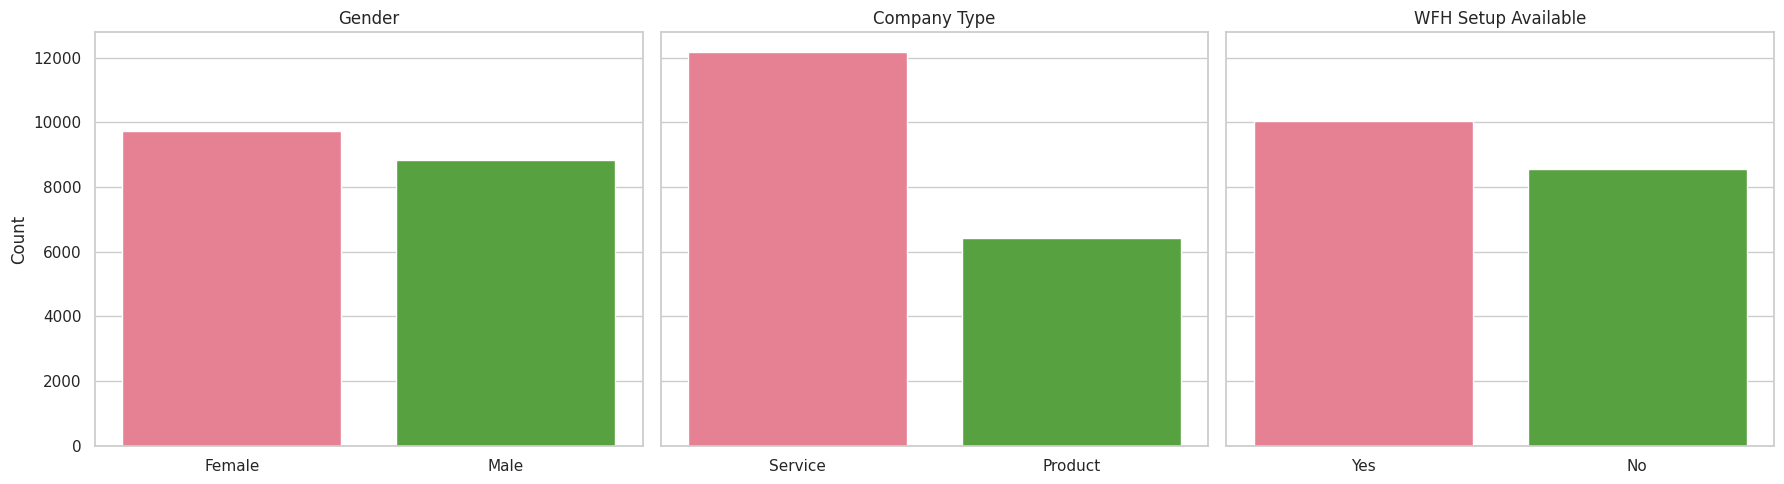

In [ ]:
cat_columns = data.select_dtypes(object).columns

fig, ax = plt.subplots(nrows=1, ncols=len(cat_columns), sharey=True, figsize=(18, 5))
palette = sns.color_palette("husl", 3)
for i, c in enumerate(cat_columns):
    value_counts = data[c].value_counts()
    sns.barplot(x=value_counts.index, y=value_counts.values, ax=ax[i], palette=palette[:len(value_counts)])
    ax[i].set_title(c)
    ax[i].set_xlabel('')
    ax[i].set_ylabel('Count')

plt.tight_layout()
plt.show()

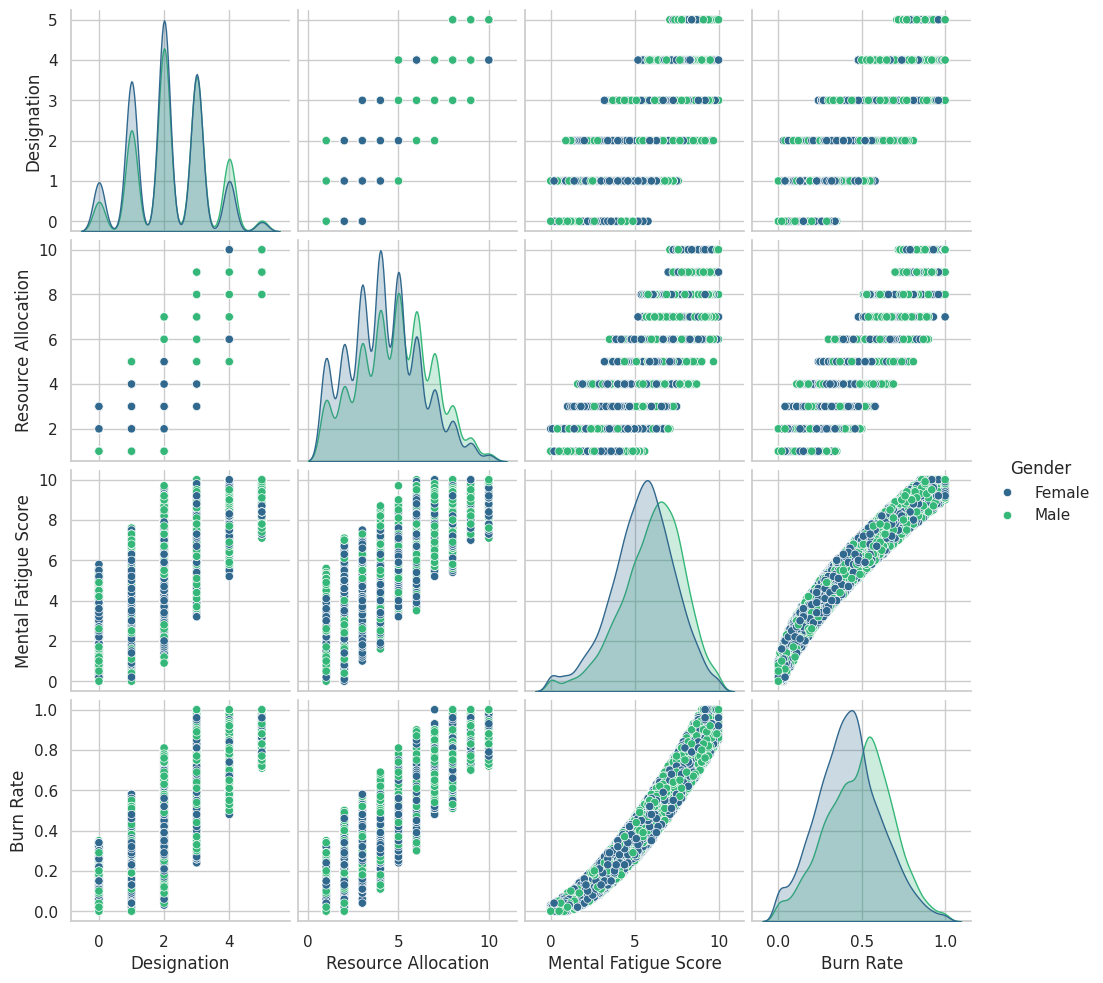

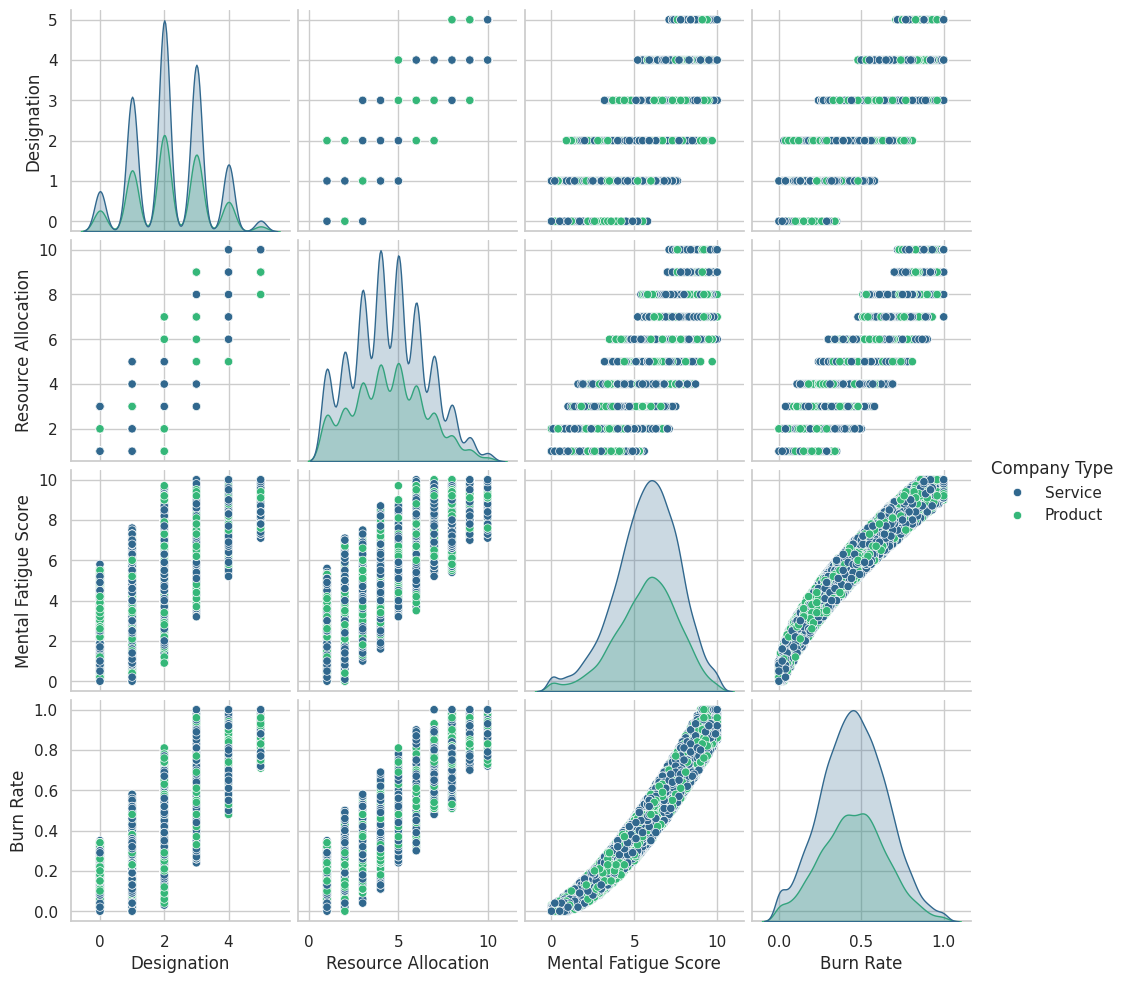

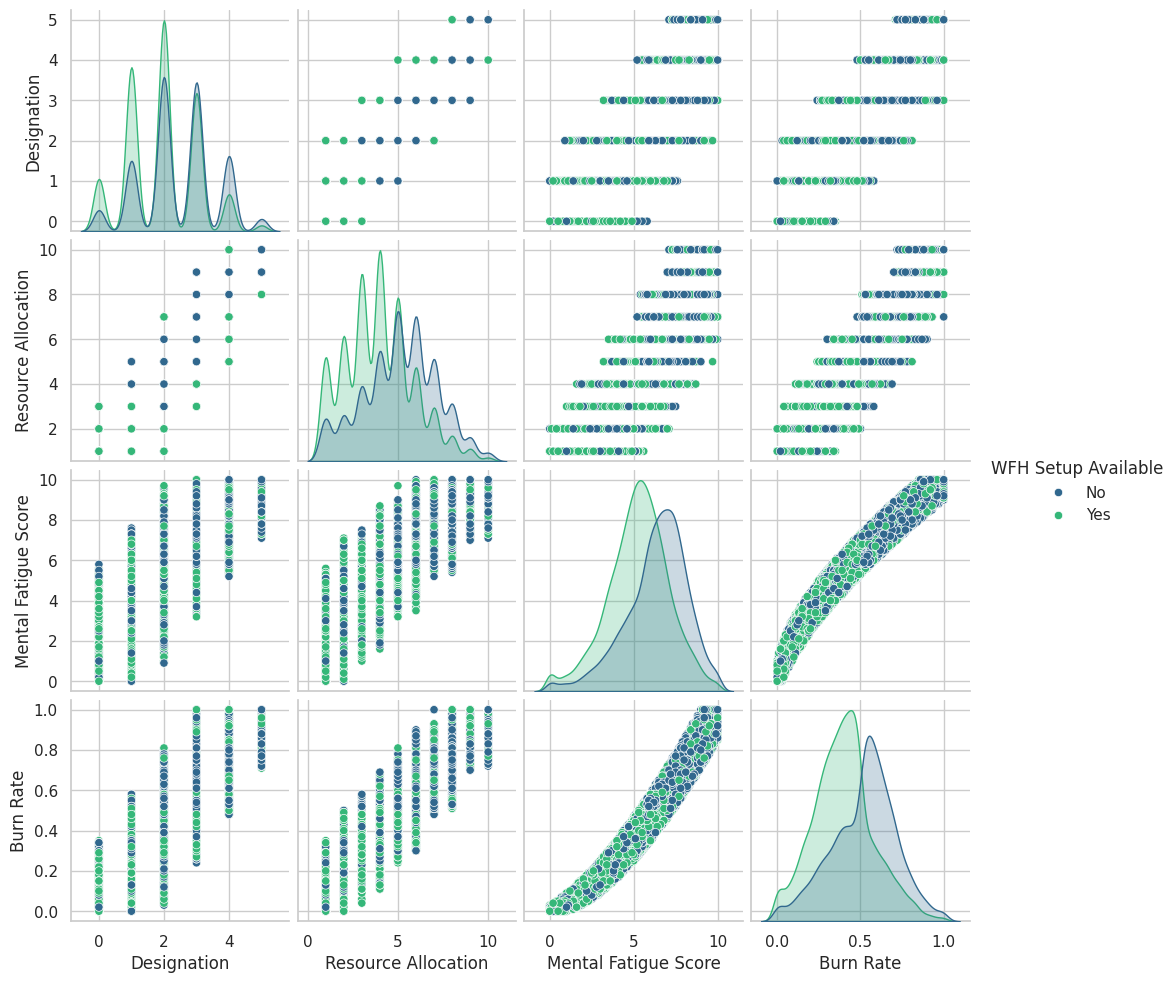

In [ ]:
sns.set(style="whitegrid")
for c in data.select_dtypes(object).columns:
    sns.pairplot(data, hue=c,palette='viridis')

plt.show()

# One Hot Encoding and Outlier Detection/Removal


 Encoding categorical variables.


In [ ]:
if all(col in data.columns for col in ['Company Type', 'WFH Setup Available', 'Gender']):
    data = pd.get_dummies(data, columns=['Company Type', 'WFH Setup Available', 'Gender'], drop_first=True)
    encoded_columns = data.columns
else:
    print("Error: One or more of the specified columns are not present in the DataFrame.")
    encoded_columns = None
    print(data.columns)


Visualization of encoded categorical variables.


<ipython-input-117-cdfc6a07c1f9>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, ax=ax[i], palette='pastel')
<ipython-input-117-cdfc6a07c1f9>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, ax=ax[i], palette='pastel')
<ipython-input-117-cdfc6a07c1f9>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, ax=ax[i], palette='pastel')


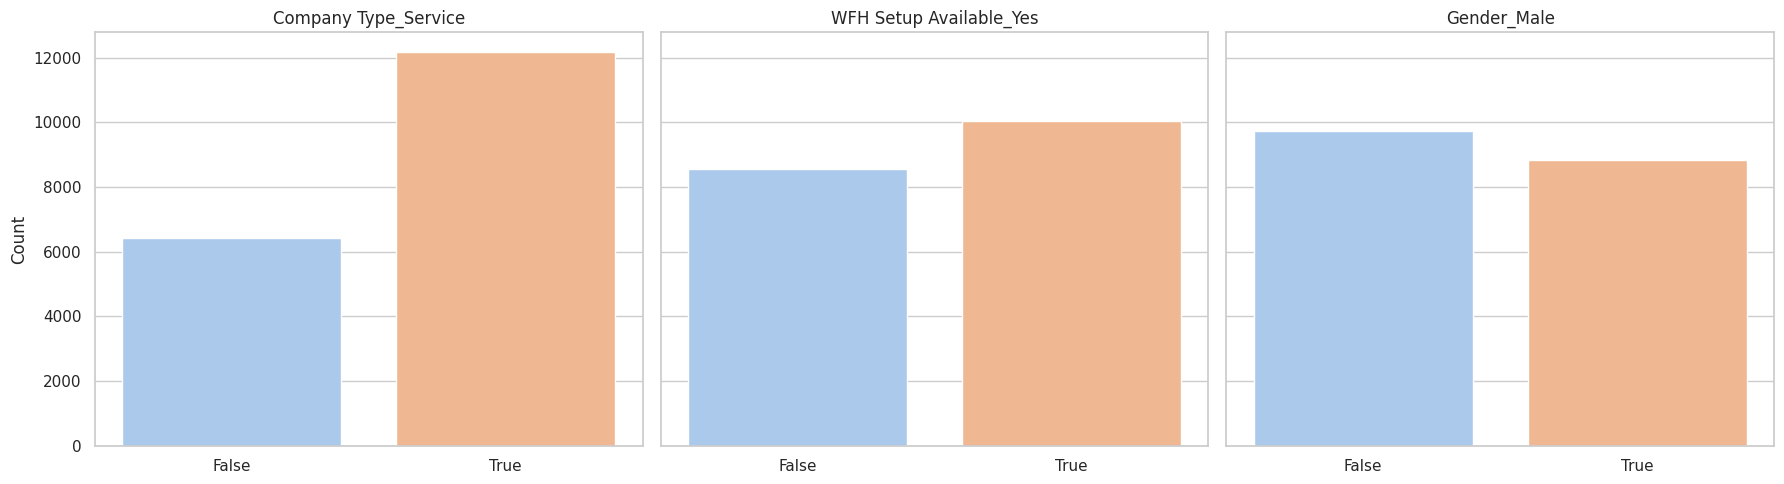

In [ ]:
encoded_cat_columns = [col for col in data.columns if 'Company Type' in col or 'WFH Setup Available' in col or 'Gender' in col]
fig, ax = plt.subplots(nrows=1, ncols=len(encoded_cat_columns), sharey=True, figsize=(18, 5))

for i, c in enumerate(encoded_cat_columns):
    value_counts = data[c].value_counts()
    sns.barplot(x=value_counts.index, y=value_counts.values, ax=ax[i], palette='pastel')
    ax[i].set_title(c)
    ax[i].set_xlabel('')
    ax[i].set_ylabel('Count')

plt.tight_layout()
plt.show()

 Heatmap after encoding.


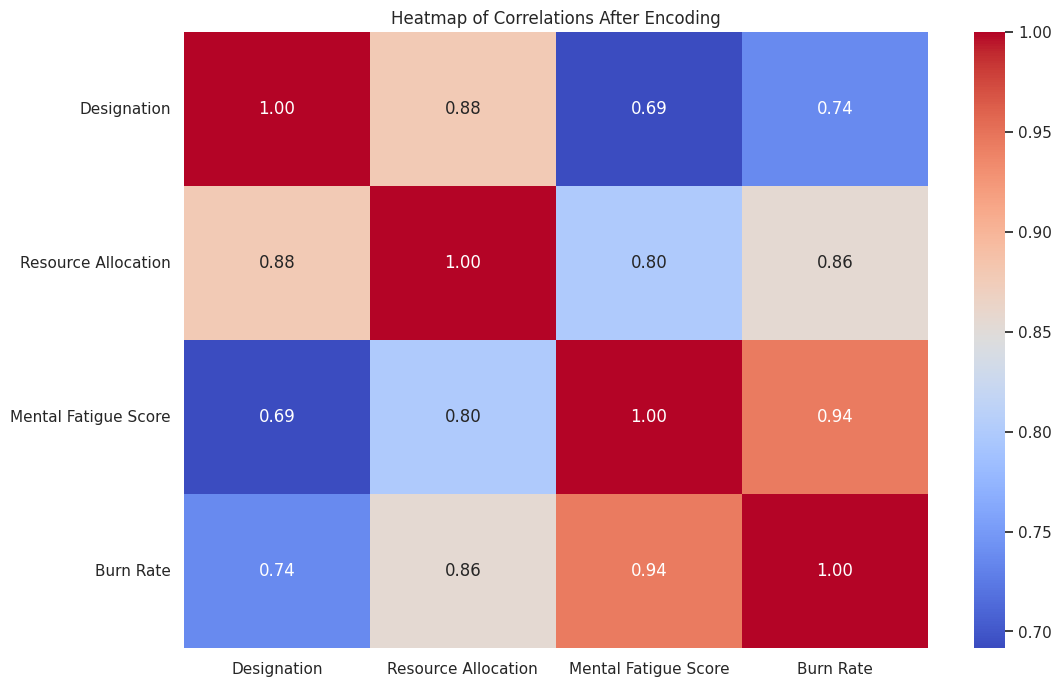

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(data.select_dtypes(include=[np.number]).corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap of Correlations After Encoding')
plt.show()

Boxplot for outlier detection before removal.


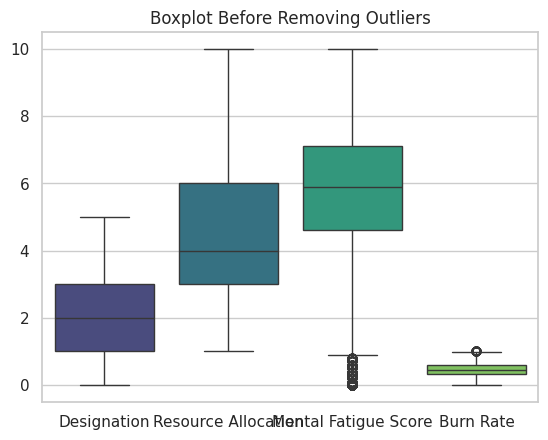

In [ ]:
sns.boxplot(data=data.select_dtypes(include=[np.number]), palette='viridis')
plt.title('Boxplot Before Removing Outliers')
plt.show()

Removing outliers using IQR method.


In [ ]:
numerical_columns = data.select_dtypes(include=[np.number]).columns

Q1 = data[numerical_columns].quantile(0.25)
Q3 = data[numerical_columns].quantile(0.75)
IQR = Q3 - Q1

In [ ]:
data = data[~((data[numerical_columns] < (Q1 - 1.5 * IQR)) | (data[numerical_columns] > (Q3 + 1.5 * IQR))).any(axis=1)]


#
 Boxplot after outlier removal.


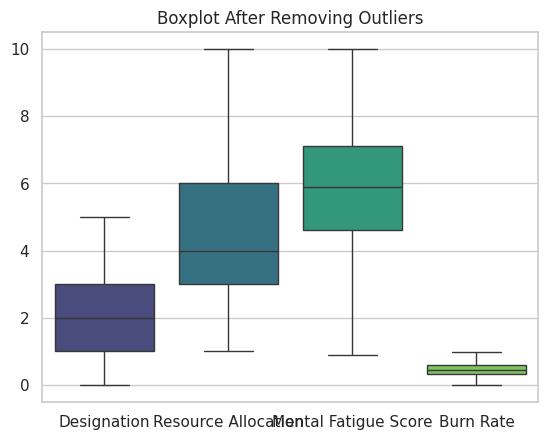

In [ ]:
sns.boxplot(data=data[numerical_columns], palette='viridis')
plt.title('Boxplot After Removing Outliers')
plt.show()

 Data Overview Post-Outlier Removal


In [ ]:
print(data.shape)

(18215, 7)


 Correlation analysis post outlier removal.


In [ ]:
data.corr(numeric_only=True)['Burn Rate'][:-1]


Designation                0.719458
Resource Allocation        0.845620
Mental Fatigue Score       0.941141
Burn Rate                  1.000000
Company Type_Service       0.003784
WFH Setup Available_Yes   -0.314860
Name: Burn Rate, dtype: float64

 Dropping less significant features.


In [ ]:
data=data.drop('Company Type_Service', axis=1)
data=data.drop('WFH Setup Available_Yes', axis=1)
data=data.drop('Gender_Male', axis=1)


 Visualization of Burn Rate distribution.


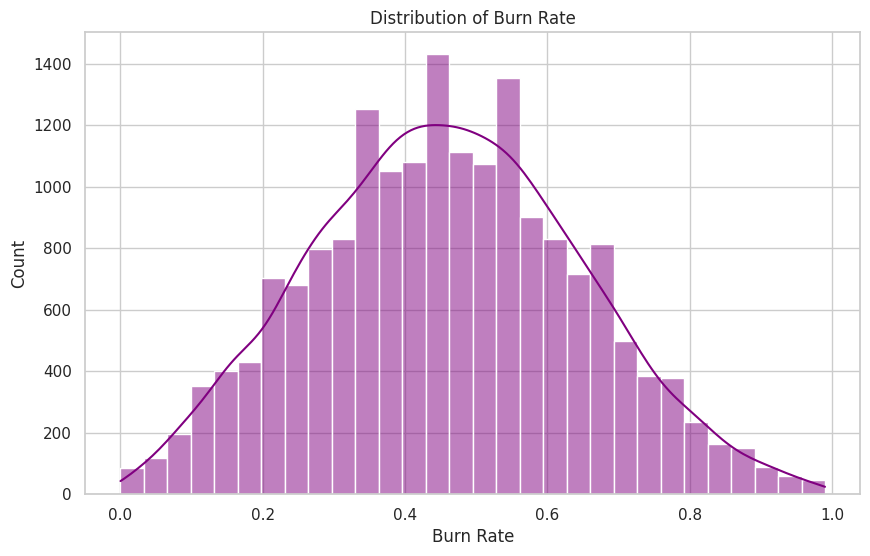

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Burn Rate'], bins=30, kde=True, color='purple')
plt.title('Distribution of Burn Rate')
plt.show()

#Preprocessing

Separating features and target variable.


In [ ]:
Y=data['Burn Rate']
X=data.drop('Burn Rate',axis=1)

Splitting the dataset into training and testing sets.


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.7, shuffle=True, random_state=1)


Normalizing the feature values using MinMaxScaler.


In [ ]:
scaler= MinMaxScaler()
scaler.fit(X_train)
X_train=pd.DataFrame(scaler.transform(X_train),index=X_train.index,columns=X_train.columns)
X_test=pd.DataFrame(scaler.transform(X_test),index=X_test.index,columns=X_test.columns)


 Display normalized training data.


In [ ]:
X_train


,Designation,Resource Allocation,Mental Fatigue Score
8577,0.8,0.666667,0.714286
18389,0.2,0.333333,0.549451
4038,0.2,0.222222,0.186813
12406,0.6,0.555556,0.912088
5146,0.4,0.222222,0.175824
...,...,...,...
13735,0.4,0.555556,0.604396
21623,0.6,0.444444,0.604396
6471,0.6,0.666667,0.857143
15260,0.2,0.222222,0.615385


In [ ]:
Y_train


8577     0.76
18389    0.41
4038     0.20
12406    0.84
5146     0.11
         ... 
13735    0.57
21623    0.42
6471     0.70
15260    0.46
294      0.39
Name: Burn Rate, Length: 12750, dtype: float64

# Model Building: Linear Regression


 Training a Linear Regression model on the training data.


In [ ]:
linear_regression_model = LinearRegression()


In [ ]:
linear_regression_model.fit(X_train,Y_train)


LinearRegression()

# Model Evaluation


Evaluating the model's performance on the test set.


In [ ]:

print("Linear Regression Model Performance Metrics:\n")
# make predictions on the test set
Y_pred=linear_regression_model.predict(X_test)

# calculate mean squared error
mse=mean_squared_error(Y_test,Y_pred)
print("Mean Squared Error:",mse)

# calculate root mean squared error
rmse=mean_squared_error(Y_test,Y_pred,squared=False)
print("Root Mean Squared Error:",rmse)

# calculate mean absolute error
mae=mean_absolute_error(Y_test,Y_pred)
print("Mean Absolute Error:",mae)

# calculate R-squared score
r2=r2_score(Y_test,Y_pred)
print("R-Squared score:",r2)

Linear Regression Model Performance Metrics:

Mean Squared Error: 0.0030280995140975356
Root Mean Squared Error: 0.05502817018671015
Mean Absolute Error: 0.04509190829035063
R-Squared score: 0.9128960217701027


Based in the evaluation metrics, the Linear Regression model appears to be the best model for predicting burnout analysis.

It has the lowest mean squared error, root mean squared error and mean absolute error, indicating better accuracy and precision in its predictions. Additionally, it has the highest R-squared score, indicating a good fit to the data and explaining a higher proportion of the variance in the target variable.

So we are choosing this model for deployment.

In [ ]:
data


,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,2,3.0,3.8,0.16
1,1,2.0,5.0,0.36
3,1,1.0,2.6,0.20
4,3,7.0,6.9,0.52
5,2,4.0,3.6,0.29
...,...,...,...,...
22743,1,3.0,6.0,0.48
22744,3,7.0,6.2,0.54
22746,3,6.0,6.7,0.59
22748,2,5.0,5.9,0.52


#Prediction with New Data


 Predicting burnout for new employee data.


In [ ]:
new_data = {
    'Designation': [0.5751, 0.8, 0.6],
    'Resource Allocation': [0.6247, 0.7, 0.5],
    'Mental Fatigue Score': [0.7813, 0.9, 0.4]
}
new_inp = pd.DataFrame(new_data)
new_predict = linear_regression_model.predict(new_inp)
print("Prediction of burnout of employees is:", new_predict)

Prediction of burnout of employees is: [0.68183479 0.77797618 0.38378067]
